In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
%matplotlib inline

In [4]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [48]:
df.shape

(23, 2)

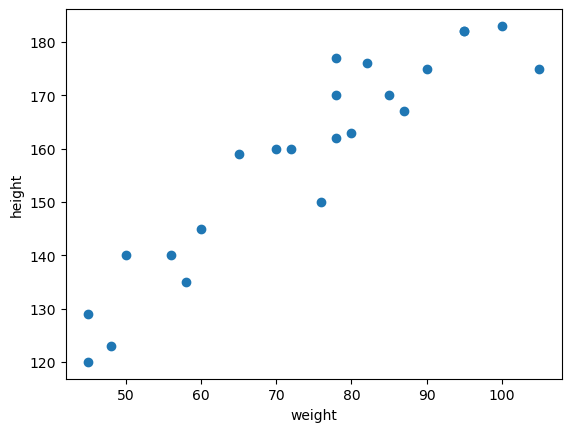

In [7]:
# scatter plot : how independent and dependent features are related ---> linear relationship
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [8]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


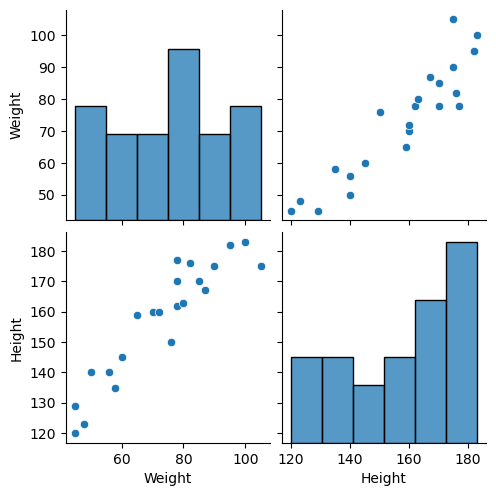

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
X = df[['Weight']]
y = df['Height']

In [13]:
X.shape,y.shape

((23, 1), (23,))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape

(17, 1)

In [19]:
# standardisation if not standaried convergence to glabal minima wil take long time
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
# data leakage 
X_test = scaler.transform(X_test)

In [23]:
## apply lin reg
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [29]:
print("Slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Slope: [17.2982057]
Intercept: 156.47058823529412


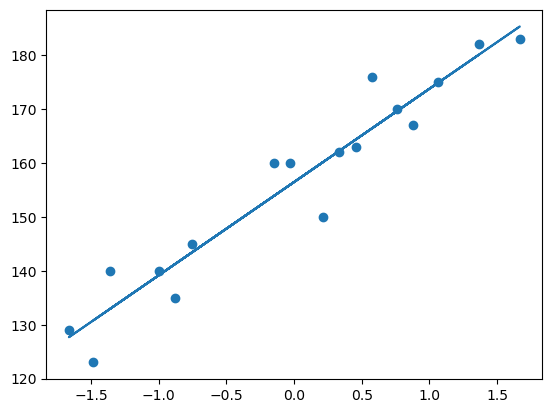

In [31]:
# plot best fit line training data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [32]:
# prediction for test data
y_pred = regression.predict(X_test)

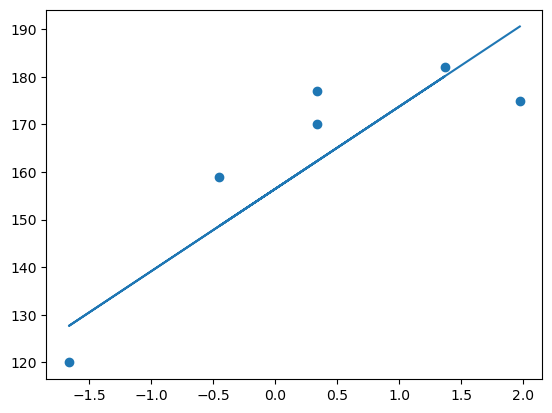

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [37]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)

mse: 114.84069295228699
mae: 9.665125886795005
rmse: 10.716374991212605


In [39]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [43]:
X_train.shape,X_test.shape

((17, 1), (6, 1))

In [41]:
# ols lin reg
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 28 Mar 2025   Prob (F-statistic):                       0.664
Time:                        16:07:36   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Summary
- The model is very weak (R² = 1.2%), meaning x1 does not explain Height well.
- F statistics :  This tests whether the independent variable is statistically significant.p-value (0.664) is very high (>0.05), meaning the predictor is NOT significant.
- Log Likelyhood,AIC,BIC : higher value poor model fit
- High std err : coeff estimation is not proper
- Skewness and Kurtosis is for model residuals(errors) :  close to 0, the errors (residuals) are almost evenly distributed around mean. No major left or right bias in the model's predictions.Slightly negative skewness means the model very slightly overestimates actual values.A perfect normal distribution has a kurtosis of 3.value (2.581) is close to 3, meaning there are no extreme outliers.
- Note:
- Left Skewed (Negative Skewness) → Model overestimates actual values.Price prediction-->predicted price is higher than actual price
- Right Skewed (Positive Skewness) → Model underestimates actual values.---> actual price higher than prediction
- Skewness ≈ 0 → No major bias in predictions.
- Kurtosis < 3 (Flat) Platykurtic → Fewer outliers, predictions are consistent but may miss extreme cases. it means the model makes stable predictions, but it might not detect very high or very low house prices well.
- Kurtosis > 3 (Peaked) Leptokurtic → More extreme errors, predictions are good for most cases but sometimes way off. it means it predicts normal houses well, but struggles with luxury or very cheap houses, leading to big prediction errors in those cases.
- Kurtosis ≈ 3 (Normal) → Balanced errors, residuals follow a normal distribution. it means the model makes errors in a normal, expected way, handling both typical and extreme cases reasonably well.

In [47]:
regression.predict(scaler.transform([[72]]))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])